# Lecture 15: Practical Intro to IBM Qiskit

In [1]:
# Import usual python numerical library
import numpy as np
# Importing standard Qiskit libraries
from qiskit import *
%matplotlib inline

import os 
os.environ['PATH'] = '/usr/local/texlive/2025/bin/x86_64-linux' + os.environ['PATH']

In [2]:
import subprocess

#this is so I can run the code on my computer without sharing my token online
#you can get your own token at https://quantum-computing.ibm.com/account
token = subprocess.run("echo $IBM_TOKEN", shell=True, stdout=subprocess.PIPE).stdout.decode('utf-8').strip()
# for the bots out there, I invalitdated the toke I accedentally shared

In [3]:
# Insert your token
from qiskit_ibm_runtime import QiskitRuntimeService
 
QiskitRuntimeService.save_account(
  token=token,
  channel="ibm_quantum", # `channel` distinguishes between different account types
  overwrite=True, set_as_default=True)

In [4]:
# List the backends available to you. 
service = QiskitRuntimeService(channel="ibm_quantum")
service.backends()

KeyboardInterrupt: 

In [5]:
from qiskit_aer import AerSimulator

In [6]:
# This sets a simulator and a real device for you to work with. Feel free to choose a different real device by 
# checking if it's less busy.
backend_simulator = AerSimulator()
backend_brisbane = service.backend("ibm_brisbane")

In [7]:
import os
import subprocess

# Set the PATH to include the directory where pdflatex is installed
os.environ['PATH'] = '/usr/local/texlive/2025/bin:' + os.environ['PATH']

# Verify that pdflatex is available
subprocess.run("pdflatex --version", shell=True)

pdfTeX 3.14159265-2.6-1.40.20 (TeX Live 2019/Debian)
kpathsea version 6.3.1
Copyright 2019 Han The Thanh (pdfTeX) et al.
There is NO warranty.  Redistribution of this software is
covered by the terms of both the pdfTeX copyright and
the Lesser GNU General Public License.
For more information about these matters, see the file
named COPYING and the pdfTeX source.
Primary author of pdfTeX: Han The Thanh (pdfTeX) et al.
Compiled with libpng 1.6.37; using libpng 1.6.37
Compiled with zlib 1.2.11; using zlib 1.2.11
Compiled with xpdf version 4.01


CompletedProcess(args='pdflatex --version', returncode=0)

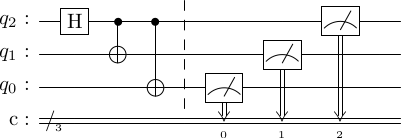

In [8]:
# Now let's construct a circuit
# Define circuit with 3 qubits, 3 cbits
circ = QuantumCircuit(3, 3)
# Apply Hadamard on qubit 2
circ.h(2)
# Apply cnot_{2,1}
circ.cx(2, 1)
# Apply cnot_{2,0}
circ.cx(2, 0)
# This adds a barrier to separate the qubit readout from the gates, makes visualization easier
circ.barrier(range(3))
# Now adding the qubit readouts
circ.measure(range(3),range(3))
# This is going to draw the circuit. IBM takes the convention that the lowest significant qubit is at the top; I can't get my mind around this :-). 
# So I tell IBM to reverse the orders of the qubits when printing the circuit. That way the notation becomes consistent with our convention.  
circ.draw(reverse_bits=True, output="latex")

In [9]:
# Now let's start running some jobs. First, let's play with the simulator. Remember, it can only handle a small circuit (about 20 qubits). 
# The command below will run the circuit in the simulator 1000 times. 
job_simulator = backend_simulator.run(circ, shots=1000)

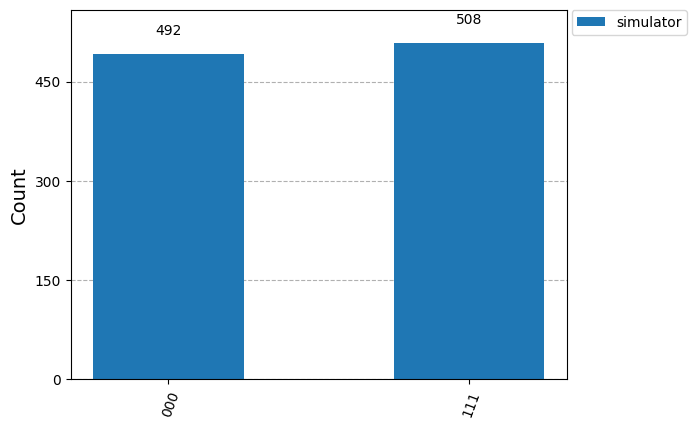

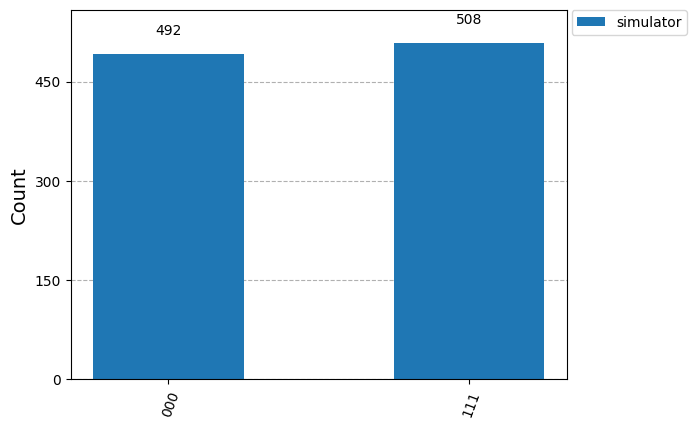

In [10]:
# Let's visualize the output. This plots the histogram of readouts.
from qiskit.visualization import *
result_simulator = job_simulator.result()
counts_simulator = result_simulator.get_counts(circ)
plot_histogram([counts_simulator], legend=['simulator'])

# IMPORTANT: The notation in the x axis shows the most significan cbit in the bottom, the least significant is at the top. 

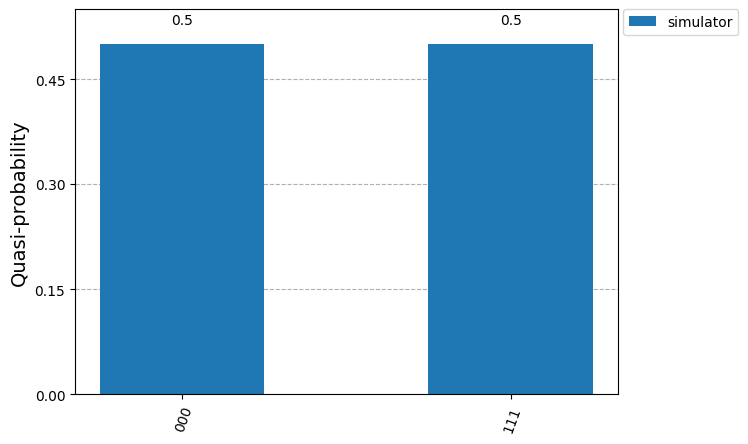

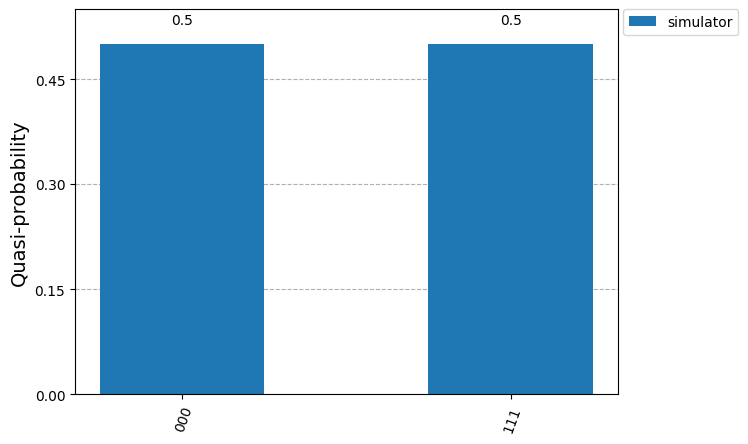

In [ ]:
# The histogram has counts, and it's convenient to convert them to an estimate of the probabilities of measurement. 
# These are called quasi-probabilities because they get accurate only when the number of shots is large. For 1000
# shots, you see that they deviate a little bit from the expected value of 0.5.
plot_distribution([counts_simulator], legend=['simulator'])

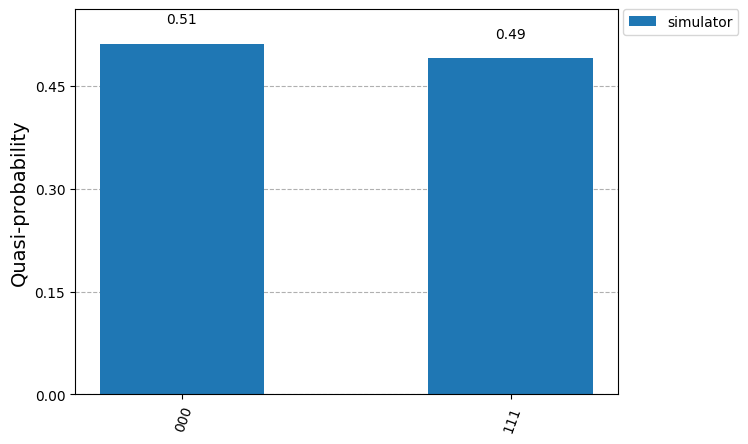

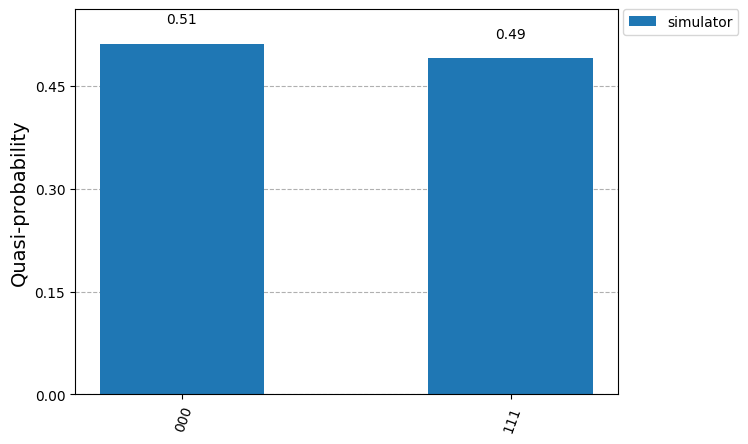

In [ ]:
# Let's increase the number of shots to see if we get closer to 0.5
job_simulator = backend_simulator.run(circ, shots=10000)
result_simulator = job_simulator.result()
counts_simulator = result_simulator.get_counts(circ)
plot_distribution([counts_simulator], legend=['simulator'])

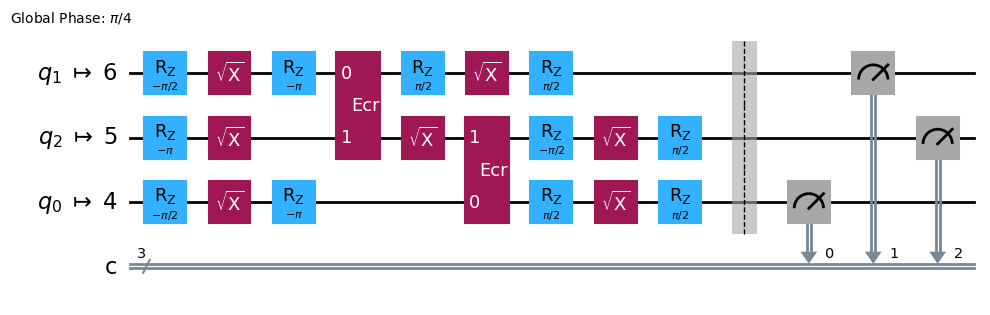

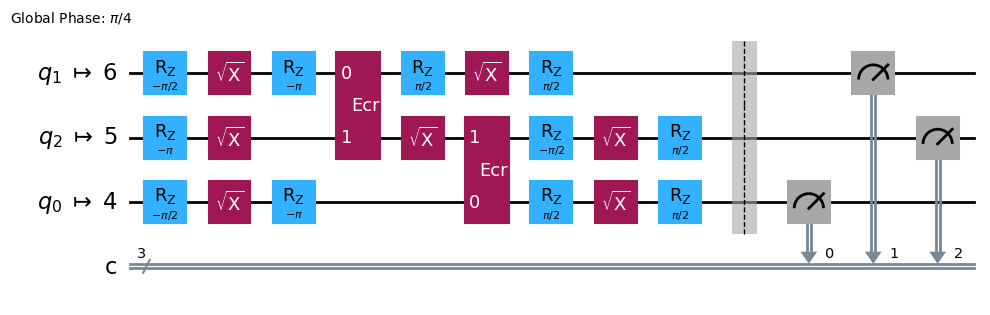

In [ ]:
# Submit job to real device -- Need to first transpile the circuit "circ" in order to convert it 
# to gates that are native to the particular hardware. This creates a circuit that adheres to the "instruction set architecture"= ISA.
# The option idle_wires=False tells qiskit 
# to not draw the wires/qubits that are not being used. 
# The first line creates the python object called "primitive" that compiles the new isa_cir. 
pm = generate_preset_pass_manager(backend=backend_brisbane, optimization_level=1)
isa_circ = pm.run(circ)
isa_circ.draw(reverse_bits=True, idle_wires=False, output="latex")

In [ ]:
# Submit job to real device (brisbane)
from qiskit_ibm_runtime import SamplerV2
sampler = SamplerV2(backend_brisbane)
job_brisbane1 = sampler.run([isa_circ])

In [ ]:
# Keep the plots below in case hardware takes too long to run

In [ ]:
counts_brisbane1 = job_brisbane1.result()[0].data.c.get_counts()
print(counts_brisbane1)

{'101': 39, '000': 1984, '111': 1929, '010': 63, '001': 44, '100': 2, '011': 8, '110': 27}


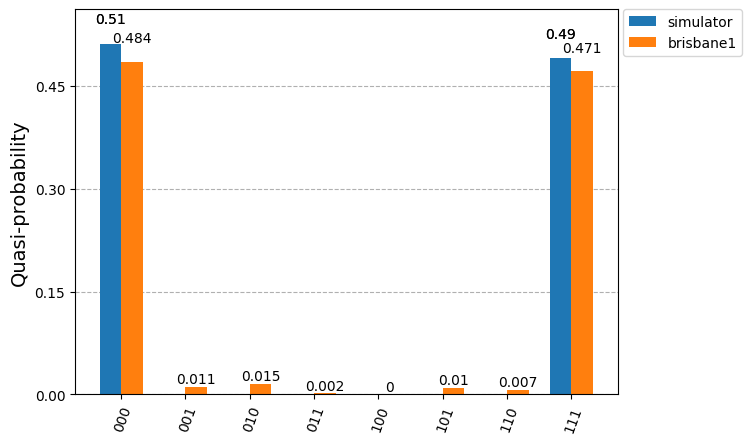

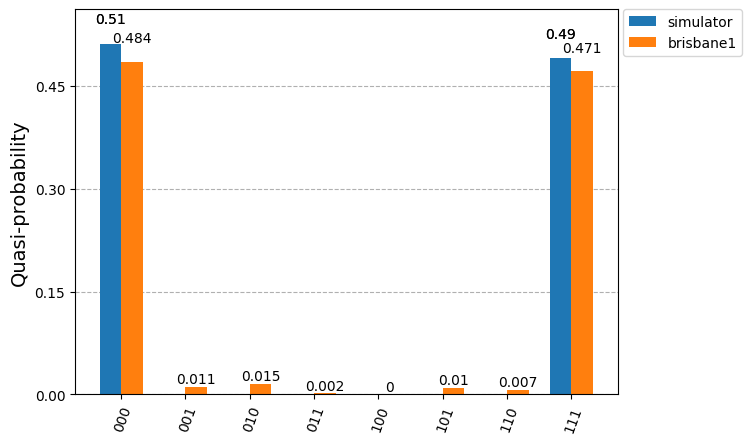

In [ ]:
# Let's plot the simulation together with our real device run to compare
plot_distribution([counts_simulator, counts_brisbane1], legend = ['simulator', 'brisbane1'] )